In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from ALLCools.plot import *
from cemba_data.tools.integration.utilities import calculate_direct_confusion

In [2]:
mc_cell_tidy_data = pd.read_msgpack('Integration/mc_cell_tidy_data.with_integration_info.msg')
rna_cell_tidy_data = pd.read_msgpack('Integration/rna_cell_tidy_data.with_integration_info.msg')
cell_tidy_data = pd.read_msgpack('Integration/Integration_cell_tidy_data.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
cfm = calculate_direct_confusion(mc_cell_tidy_data[['SubType', 'co_cluster']], 
                                 rna_cell_tidy_data[['SubType', 'co_cluster']])

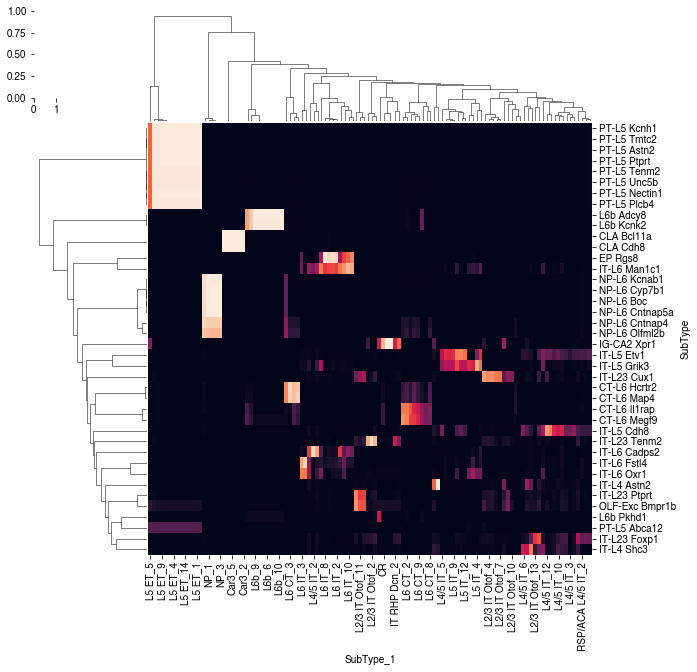

In [28]:
g = sns.clustermap(cfm, cbar=None, figsize=(10, 10))


L4/5 IT                4597
L6 CT                  4327
L2/3 IT Otof           3588
L4 IT                  2932
L6 IT                  2238
L5 IT                  1836
L6b                    1773
NP                     1634
Car3                   1616
L5 ET                   610
RSP/ACA L4/5 IT         242
L2/3 IT Cxcl14          149
CR                       15
L2/3 IT Ndst4 Endou      11
RSP_ACA IT Scnn1a         2
IT RHP Dcn                2
Name: MajorType, dtype: int64

IT-L5          6675
CT-L6          4327
IT-L23         3588
IT-L4          2932
IT-L6          2238
L6b            1773
NP-L6          1634
CLA            1616
PT-L5           610
NoMatch         164
IG-CA2 Xpr1      15
Name: MajorTypeTomC, dtype: int64


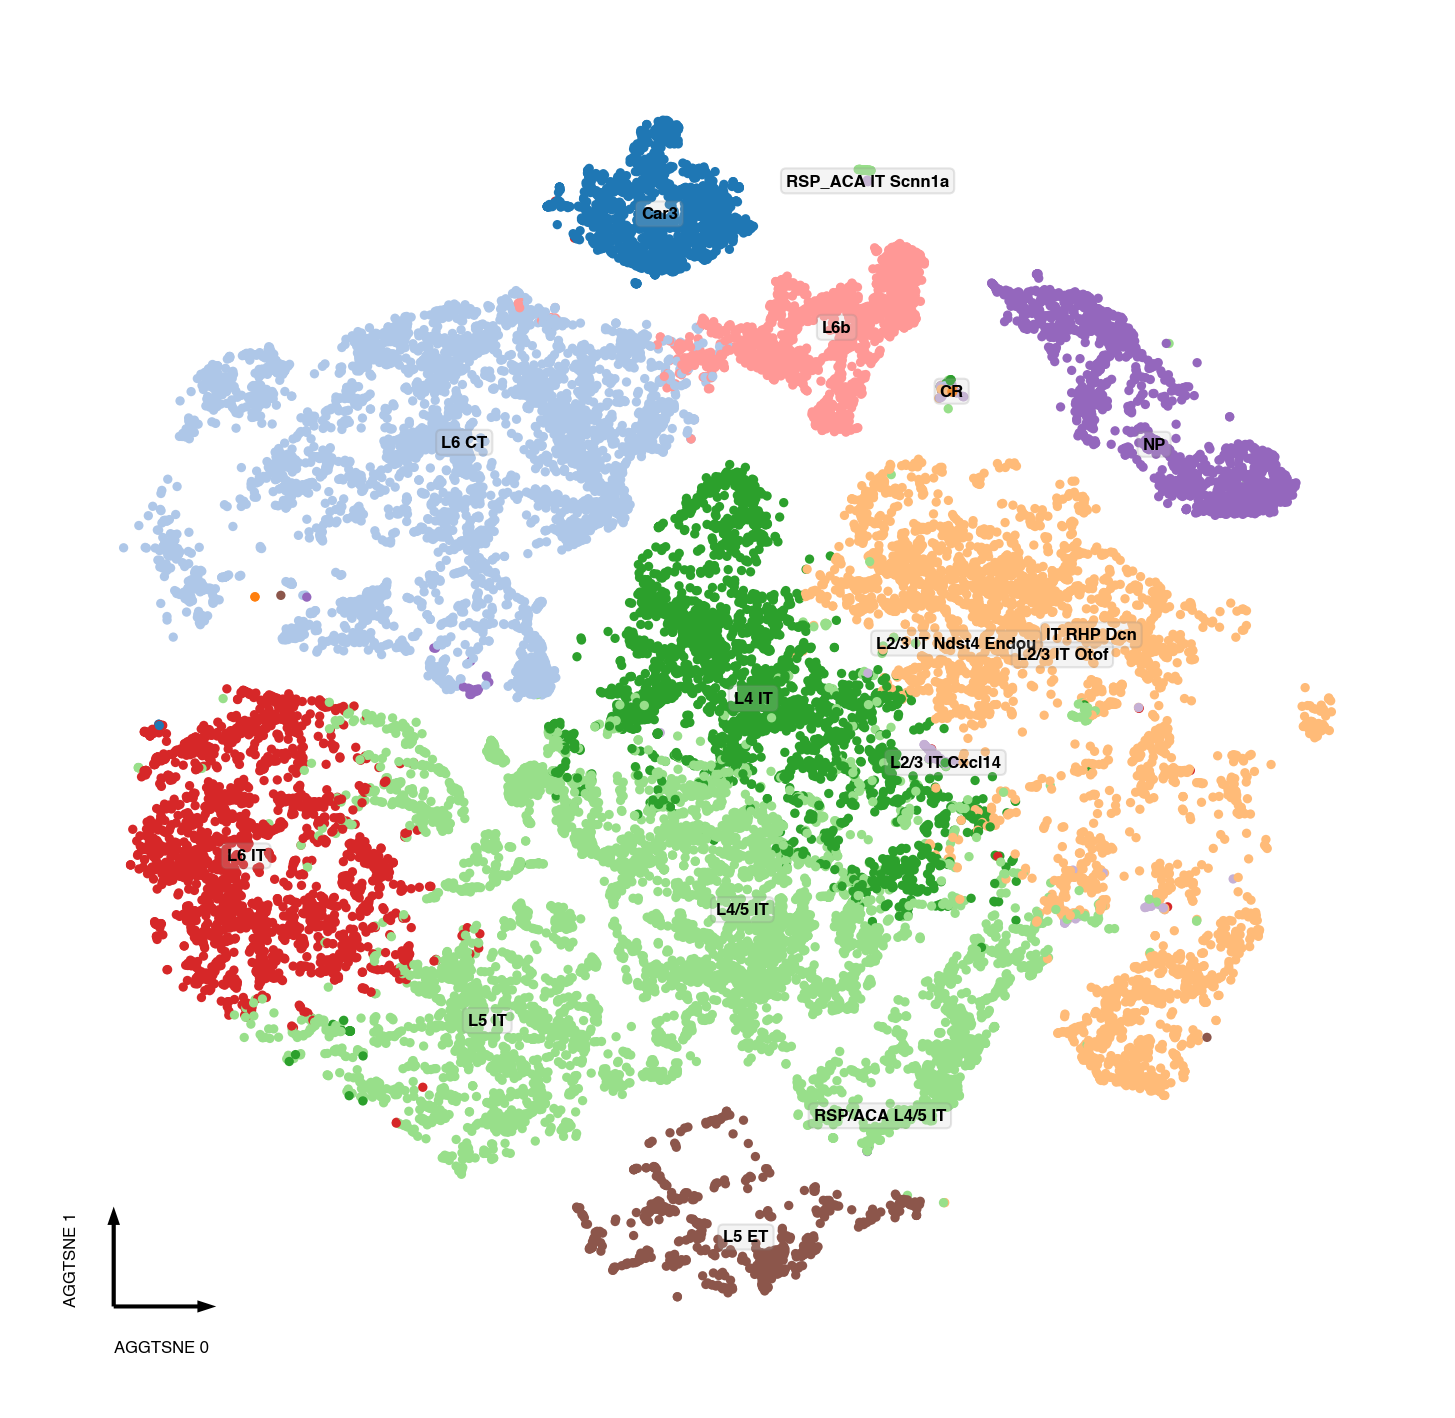

In [26]:
rna_to_mc = {
    'CR': 'IG-CA2 Xpr1',
    'Car3': 'CLA',
    'IT RHP Dcn': 'NoMatch',
    'L2/3 IT Cxcl14': 'NoMatch',
    'L2/3 IT Ndst4 Endou': 'NoMatch',
    'L2/3 IT Otof': 'IT-L23',
    'L4 IT': 'IT-L4',
    'L4/5 IT': 'IT-L5',
    'L5 ET': 'PT-L5',
    'L5 IT': 'IT-L5',
    'L6 CT': 'CT-L6',
    'L6 IT': 'IT-L6',
    'L6b': 'L6b',
    'NP': 'NP-L6',
    'RSP/ACA L4/5 IT': 'IT-L5',
    'RSP_ACA IT Scnn1a': 'NoMatch'
}

rna_cell_tidy_data['MajorTypeTomC'] = rna_cell_tidy_data['MajorType'].map(
    rna_to_mc)
print(rna_cell_tidy_data['MajorTypeTomC'].value_counts())
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

categorical_scatter(ax=ax,
                    data=rna_cell_tidy_data,
                    hue='MajorTypeTomC',
                    coord_base='aggtsne',
                    max_points=None,
                    palette='tab20',
                    scatter_kws=dict(s=5),
                    text_anno='MajorType',
                    text_anno_kws=dict(fontsize=4))
pass

In [29]:
import collections
mc_to_rna = collections.defaultdict(list)

for k, v in rna_to_mc.items():
    mc_to_rna[v].append(k)
    
mc_to_rna = {k: ','.join(v) for k, v in mc_to_rna.items()}
for k, v in mc_to_rna.items():
    print(k, v, sep='\t')

IG-CA2 Xpr1	CR
CLA	Car3
NoMatch	IT RHP Dcn,L2/3 IT Cxcl14,L2/3 IT Ndst4 Endou,RSP_ACA IT Scnn1a
IT-L23	L2/3 IT Otof
IT-L4	L4 IT
IT-L5	L4/5 IT,L5 IT,RSP/ACA L4/5 IT
PT-L5	L5 ET
CT-L6	L6 CT
IT-L6	L6 IT
L6b	L6b
NP-L6	NP


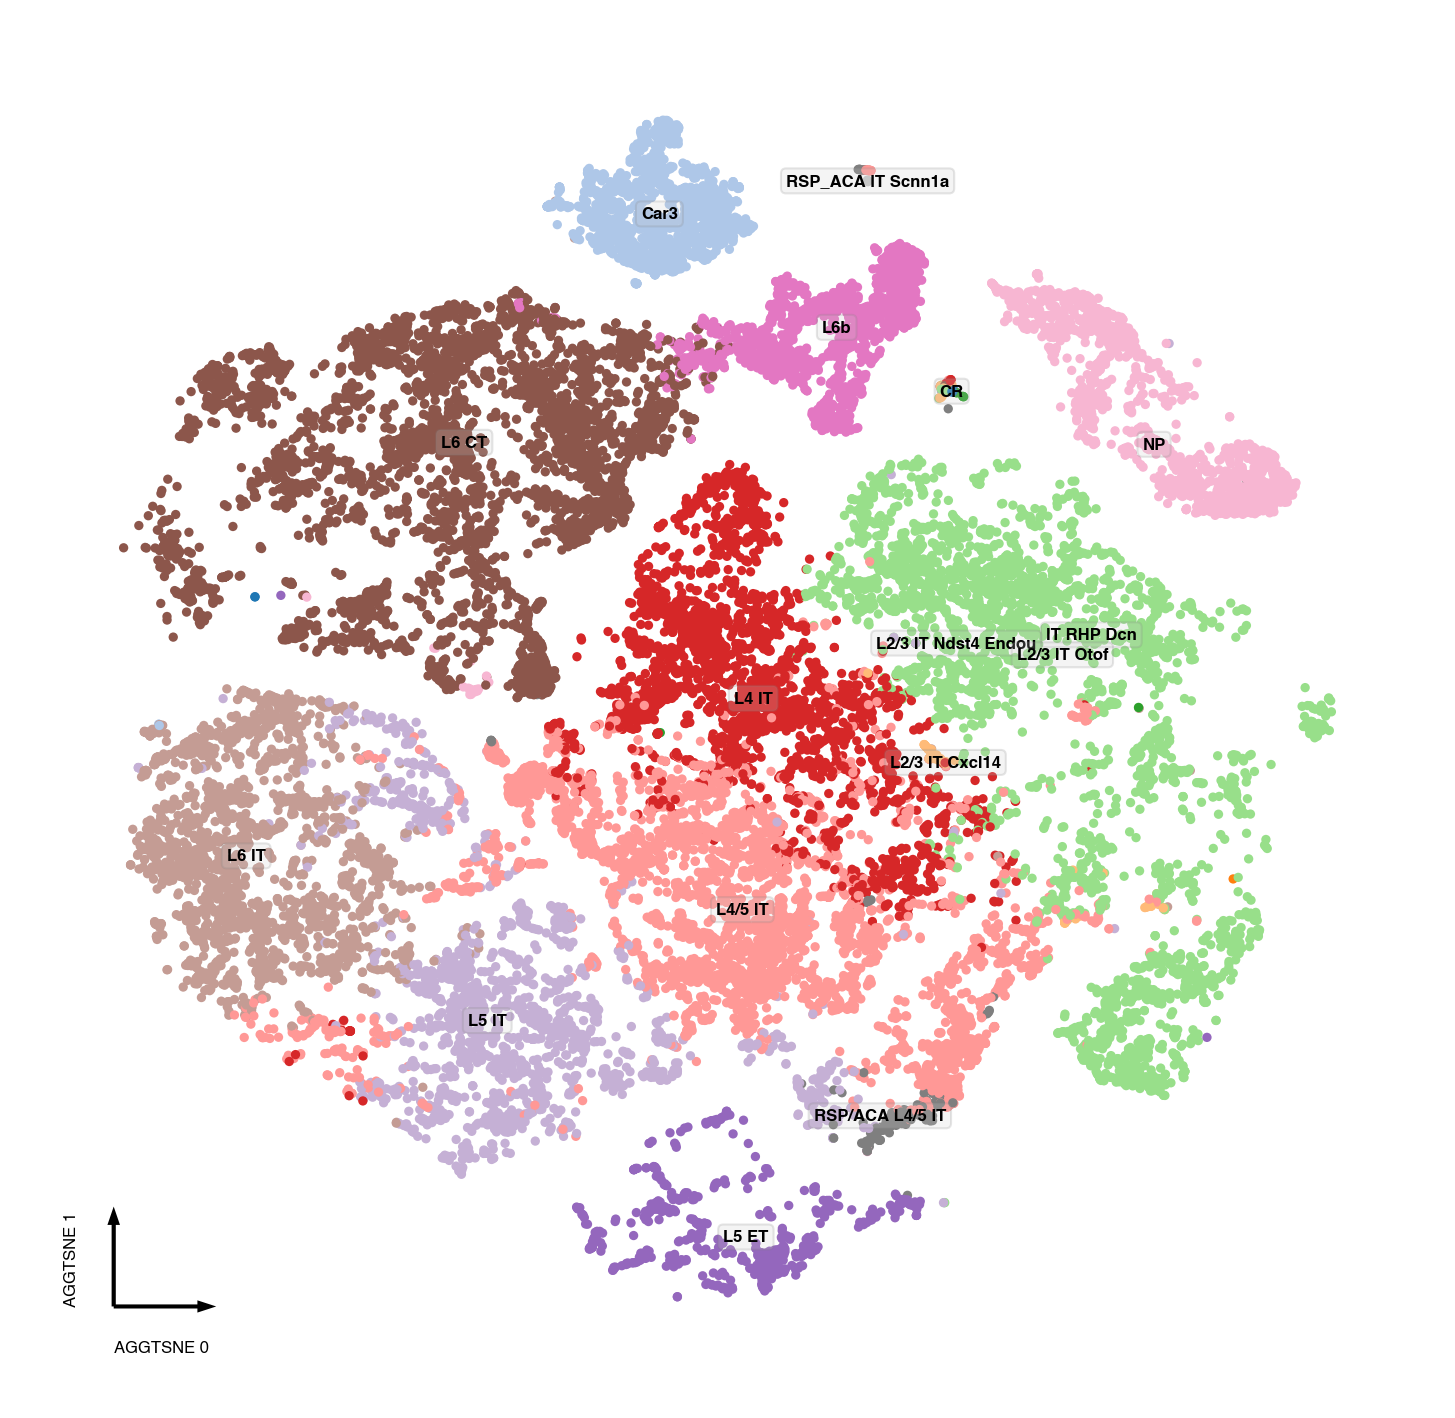

In [22]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

categorical_scatter(ax=ax,
                    data=rna_cell_tidy_data,
                    hue='MajorType',
                    coord_base='aggtsne',
                    max_points=None,
                    palette='tab20',
                    scatter_kws=dict(s=5),
                    text_anno='MajorType',
                    text_anno_kws=dict(fontsize=4))
pass

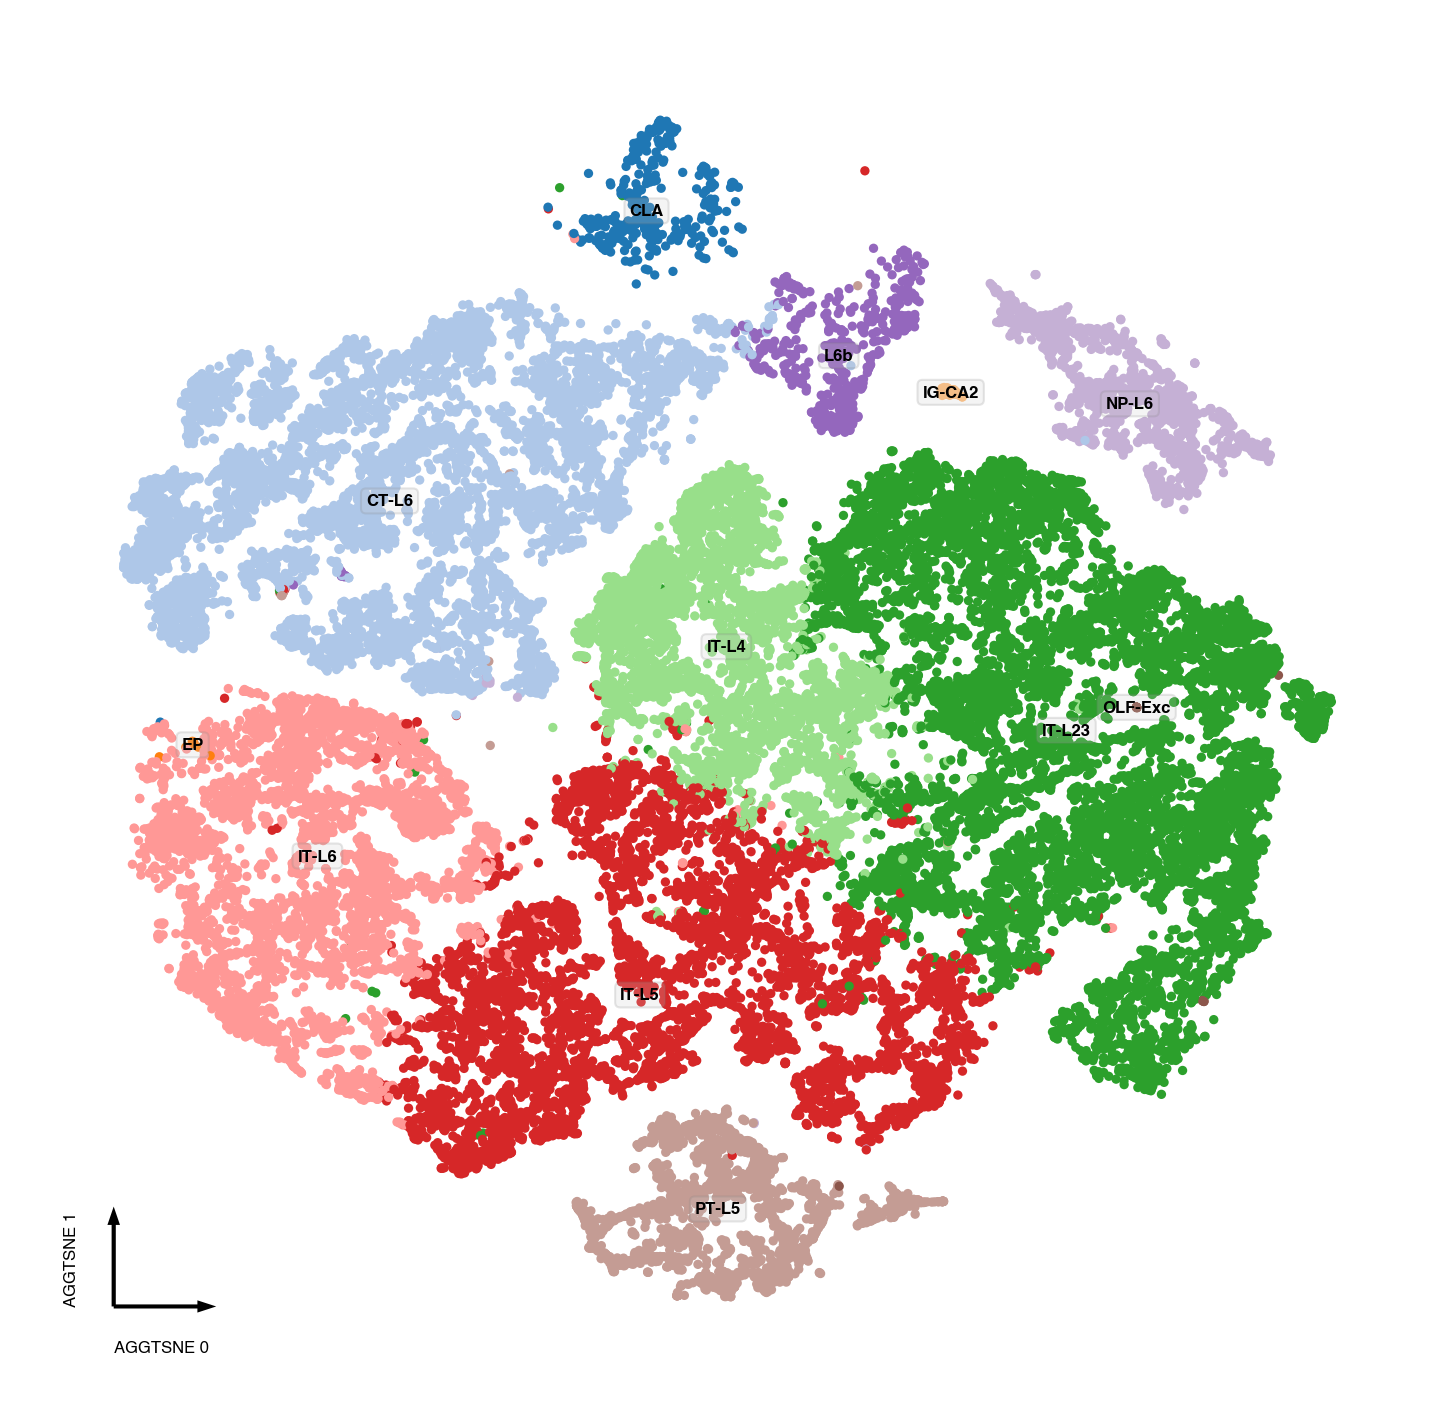

In [23]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

categorical_scatter(ax=ax,
                    data=mc_cell_tidy_data,
                    hue='MajorType',
                    coord_base='aggtsne',
                    max_points=None,
                    palette='tab20',
                    scatter_kws=dict(s=5),
                    text_anno='MajorType',
                    text_anno_kws=dict(fontsize=4))
pass